# Trabalho de Feature Engineering no dataset da Quantum Finance

## Descrição

&emsp;Utilizando todos os conhecimentos apresentados no decorrer da disciplina, utilize o dataset Quantum Finance para manipular os dados que futuramente serão utilizados por um modelo de Machine Learning para realizar predições a respeito do Score.

&emsp;O resultado da entrega deverá ser um arquivo python com toda a manipulação de dados realizada. O arquivo python deverá conter comentários para facilitar o entendimento no código, de preferência, o arquivo poderá ser entregue em formato .ipynb (Jupyter Notebook).

# Dataset "Base ScoreCredito QuantumFinance"
| Variáveis           | Descrição                        | Categorias                               |
|---------------------|----------------------------------|------------------------------------------|
| id                  | ID                               |                                          |
| idade               | Idade em anos                    |                                          |
| sexo                | Sexo                             | F = Feminino                             |
|                     |                                  | M=Masculino                              |
| estado_civil        | Estado civil                     | Solteiro                                 |
|                     |                                  | Casado                                   |
|                     |                                  | Divorciado                               |
| escola              | Grau de Instrução                | ensino fundam = até o ensino fundamental |
|                     |                                  | ensino médio                             |
|                     |                                  | Graduação                                |
|                     |                                  | Doutorado                                |
| Qte_dependentes     | Quantidade de dependentes        |                                          |
| tempo_ultimoservico | Tempo de trabalho (meses)        |                                          |
| trabalha            | Trabalha                         | 0=Não                                    |
|                     |                                  | 1=Sim                                    |
| vl_salario_mil      | Sálario                          |                                          |
| reg_moradia         | Região da moradia                | 1=Segmento geográfico A                  |
|                     |                                  | 2=Segmento geográfico B                  |
|                     |                                  | 3=Segmento geográfico C                  |
|                     |                                  | 4=Segmento geográfico D                  |
|                     |                                  | 5=Segmento geográfico E                  |
|                     |                                  | 6=Segmento geográfico F                  |
| casa_propria        | Casa própria                     | 0=Não                                    |
|                     |                                  | 1=Sim                                    |
| vl_imovel_em_mil    | Valor do imóvel (R$)             |                                          |
| Qte_cartoes         | Quantidade de cartões de crédito |                                          |
| Qte_carros          | Quantidade de carros             |                                          |
| SCORE_CREDITO       | Credit Scorging                  |                                          |


# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score, auc

# Carregando o dataframe

In [2]:
df = pd.read_csv('./datasets/Base_ScoreCredito_QuantumFinance.csv', sep=';', decimal=',')
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


# Analise exploratória

In [3]:
df.info()

# confirmando quantidade de registros importados em cada coluna, existência de dados nulos e tipo de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


In [4]:
df.describe()

# mesmo sendo variáveis numéricas, podemos constatar que as variáveis trabalha e casa_propria são categóricas / booleanas

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,1.547447,34.133208,0.911919,70.209002,3.783450,0.352424,208.999111,1.083638,0.623383,469.500364
std,3.690378e+07,8.016814,1.489079,8.221428,0.283427,55.567032,1.580486,0.477749,378.495229,0.333784,0.569796,133.814653
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.130368e+08,41.000000,0.000000,30.000000,1.000000,21.330536,3.000000,0.000000,0.000000,1.000000,0.000000,375.000000
50%,7.179264e+08,46.000000,1.000000,34.000000,1.000000,66.486331,4.000000,0.000000,0.000000,1.000000,1.000000,449.600000
75%,7.731435e+08,52.000000,3.000000,39.000000,1.000000,107.544225,5.000000,1.000000,289.000000,1.000000,1.000000,540.900000
max,8.283431e+08,73.000000,5.000000,57.000000,1.000000,233.301793,6.000000,1.000000,1800.000000,4.000000,2.000000,979.650000


In [5]:
print (f'Totais de entradas no Dataframe: {df.shape[0]}')

# quantidade de respostas únicas por variável
df.nunique()


Totais de entradas no Dataframe: 10127


id                     10127
idade                     45
sexo                       2
estado_civil               4
escola                     5
Qte_dependentes            6
tempo_ultimoservico       50
trabalha                   2
vl_salario_mil          9236
reg_moradia                6
casa_propria               2
vl_imovel_em_mil         908
Qte_cartoes                4
Qte_carros                 3
SCORE_CREDITO           1864
dtype: int64

# Limpando base

Identificamos que a Coluna id só tem entradas unicas, essa coluna não sera usada para analise

In [6]:
df.drop('id', axis=1, inplace=True)

# criando base espelho com dados brutos para servir de comparação
df_bruto = df.copy()

## Identificação de Outliers


### Outliers ###


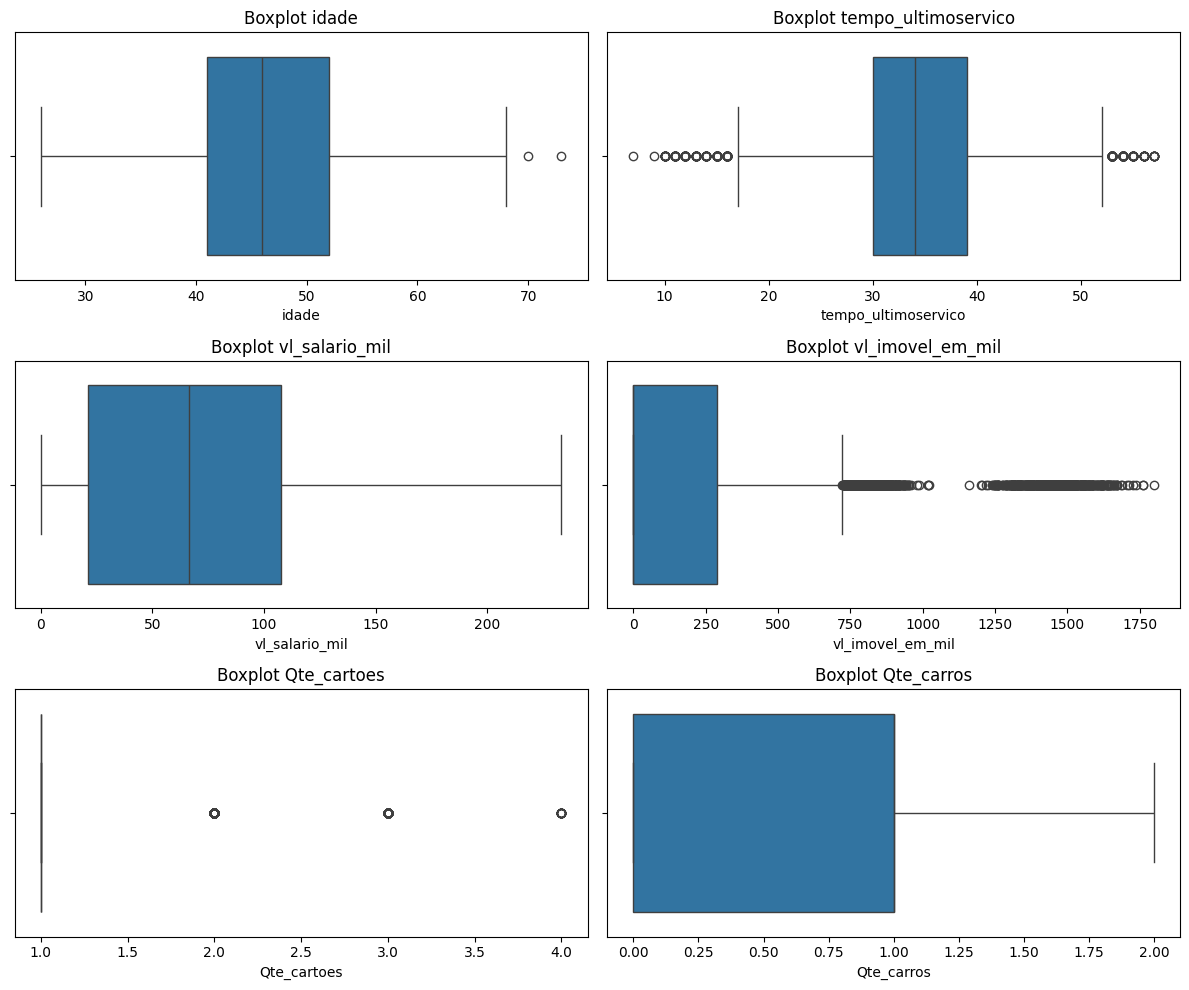

In [7]:
i=1
print("\n### Outliers ###")
plt.figure(figsize=(12, 10))
for frame in ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']:
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[frame])
    plt.title('Boxplot ' + frame)
    i+=1
plt.tight_layout()
plt.show()

# Tratamento de Outliers

### Tratando a variavel: tempo_ultimoservico
Para remover os outliers da variavel tempo_ultimoservico optamos por limitar os valores inferiores e superiores nos menores que 5% e maiores que 95% respectivamentes.


In [8]:
# df['tempo_ultimoservico'] = df['tempo_ultimoservico'].apply(lambda x: x if x >= df['tempo_ultimoservico'].quantile(0.05) else df['tempo_ultimoservico'].quantile(0.05))


In [9]:
# df['tempo_ultimoservico'] = df['tempo_ultimoservico'].apply(lambda x: x if x <= df['tempo_ultimoservico'].quantile(0.95) else df['tempo_ultimoservico'].quantile(0.95))


Na remoção dos outliers da variavel vl_imovel_em_mil odentificamos que alterar o valor inferios não gerou nenhuma melhora no blogspot decidimos remover apenas os outliers do limite superior.

In [10]:
# df['vl_imovel_em_mil'] = df['vl_imovel_em_mil'].apply(lambda x: 100 if x == 0 else x)


In [11]:
# df['vl_imovel_em_mil'] = df['vl_imovel_em_mil'].apply(lambda x: x if x <= df['vl_imovel_em_mil'].quantile(0.90) else df['vl_imovel_em_mil'].quantile(0.90))


In [12]:
# i=1
# print("\n### Outliers ###")
# plt.figure(figsize=(12, 10))
# for frame in ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']:
#     plt.subplot(3, 2, i)
#     sns.boxplot(x=df[frame])
#     plt.title('Boxplot ' + frame)
#     i+=1
# plt.tight_layout()
# plt.show()

Identificamos outliers em:

**Idade**: Apenas duas entradas apresentam valor acima do 95o percentil<br>
**Tempo de Serviço**: Algumas entradas abaixo do 5o percentil e algumas acima do 95o percentil <br>
**Valor do Imovel**: Identificamos muitas entradas com valor 0 devido ao individuo não ter imovel próprio<br>
**Quantidade de Cartões**: A maioria das pessoas possui um ou nenhum cartão<br>

Fizemos os tratamentos dos outliers, porem o modelo piorou, vamos manter todas as variáveis.


### Histograma ###


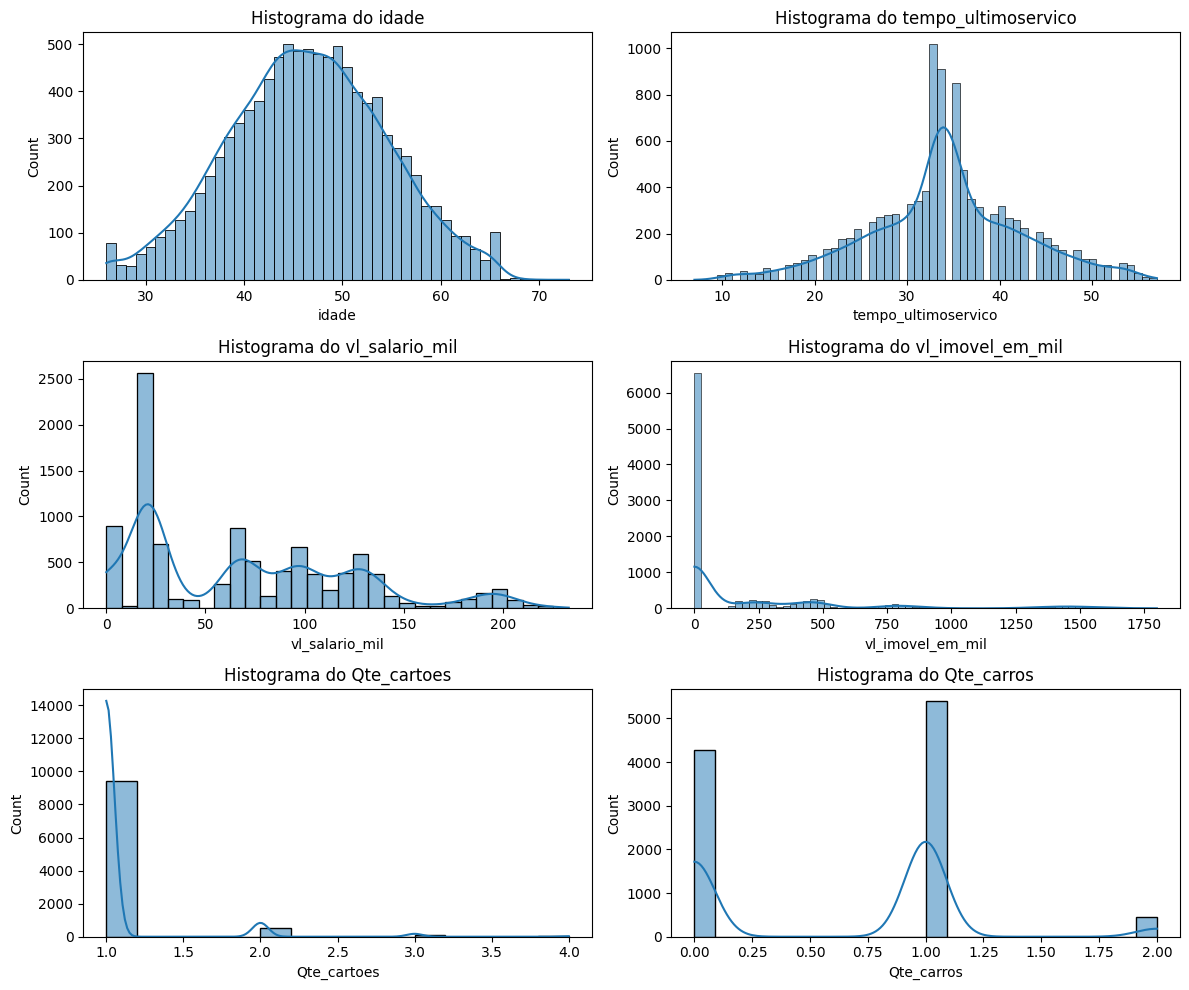

In [13]:
i=1
print("\n### Histograma ###")
plt.figure(figsize=(12, 10))
for frame in ['idade', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']:
    plt.subplot(3, 2, i)
    sns.histplot(x=df[frame], kde=True)
    plt.title('Histograma do ' + frame)
    i+=1
plt.tight_layout()
plt.show()

# idade: podemos considerar muito próximo de uma distribuição normal.
#Tempo Último Serviço: A distribuição parece ser ligeiramente assimétrica, com uma concentração maior em tempos mais curtos e alguns outliers em tempos mais longos.

# Demais variáveis: A distribuição parece ter outliers significativos, o que pode indicar uma distribuição assimétrica ou com caudas longas.


## Analise de dispersão

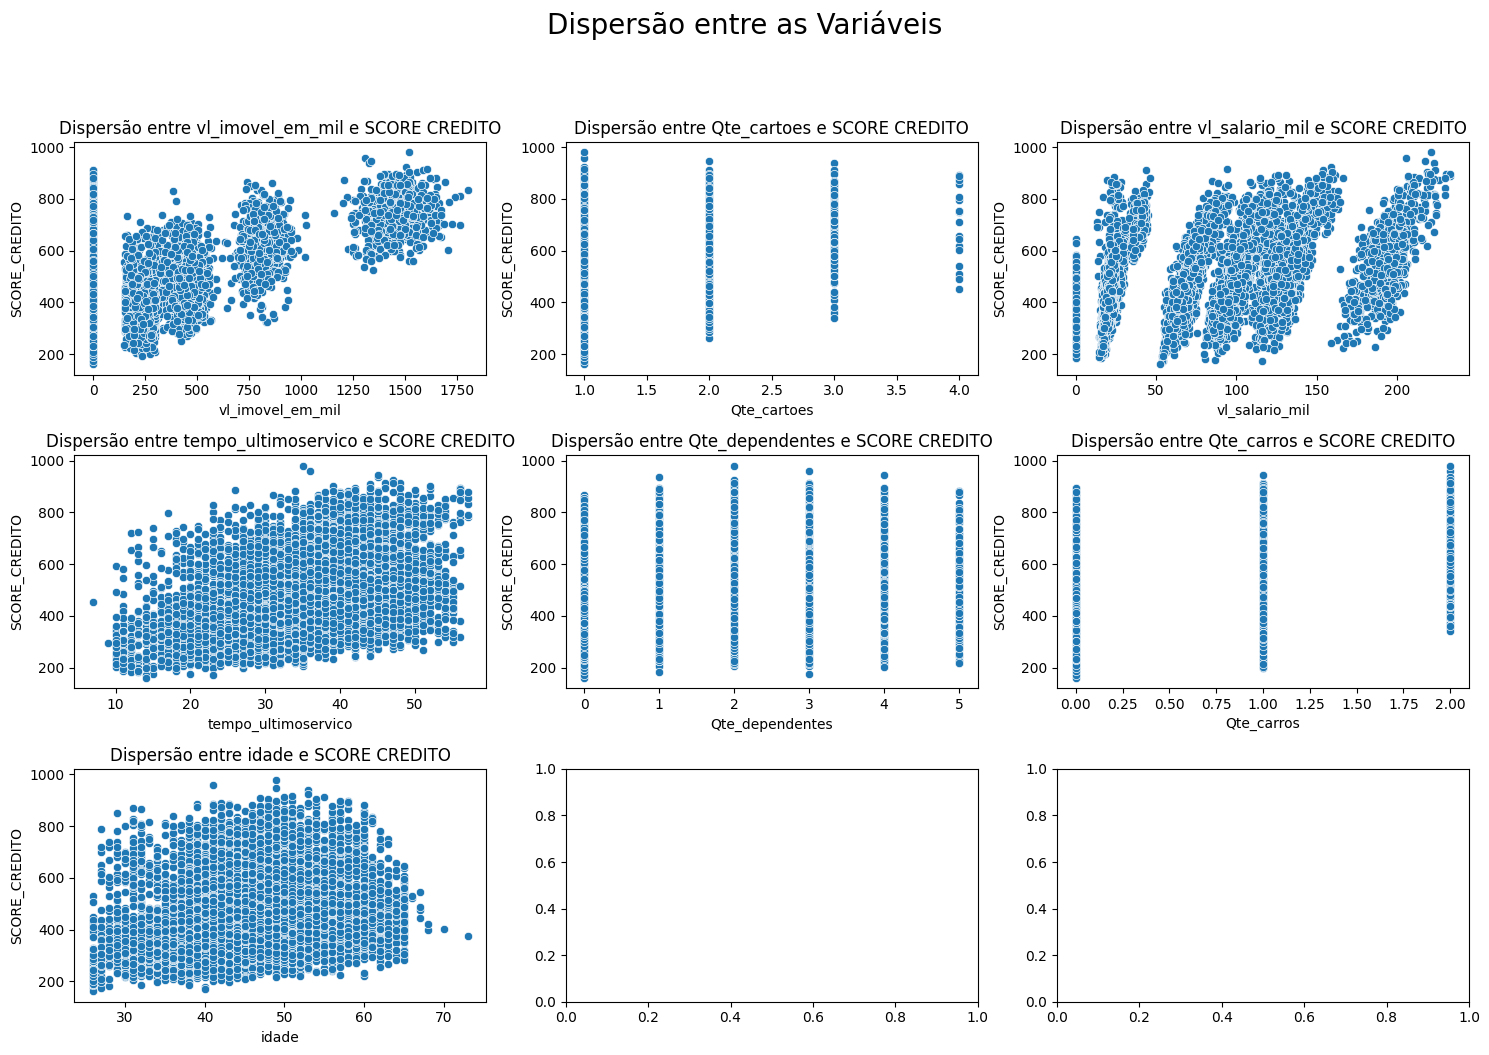

In [14]:
# Análise das variáveis quantitativas com a variável target

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
variables = ['vl_imovel_em_mil','Qte_cartoes', 'vl_salario_mil', 'tempo_ultimoservico','Qte_dependentes','Qte_carros', 'idade']

for var, ax in zip(variables, axes.flatten()):
    sns.scatterplot(data=df, x=var, y='SCORE_CREDITO', ax=ax)
    ax.set_title(f'Dispersão entre {var} e SCORE CREDITO')

fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

## Analide da SCORE_CREDITO

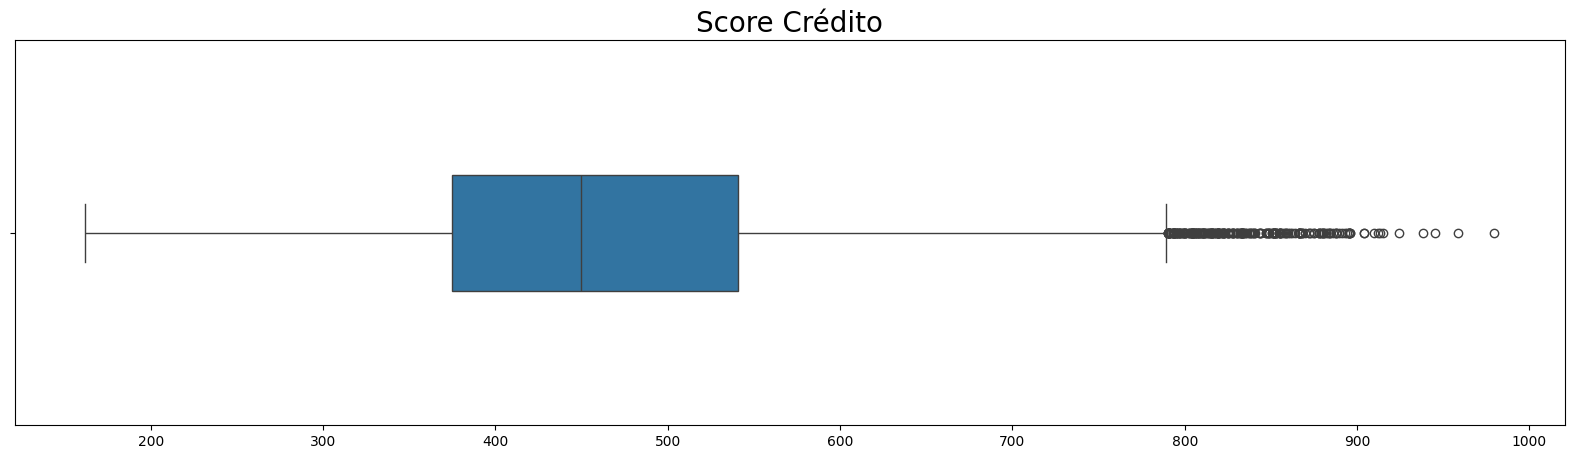

In [15]:
# Boxplot da variável target Score Crédito
ax = sns.boxplot(data=df['SCORE_CREDITO'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Score Crédito', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax;

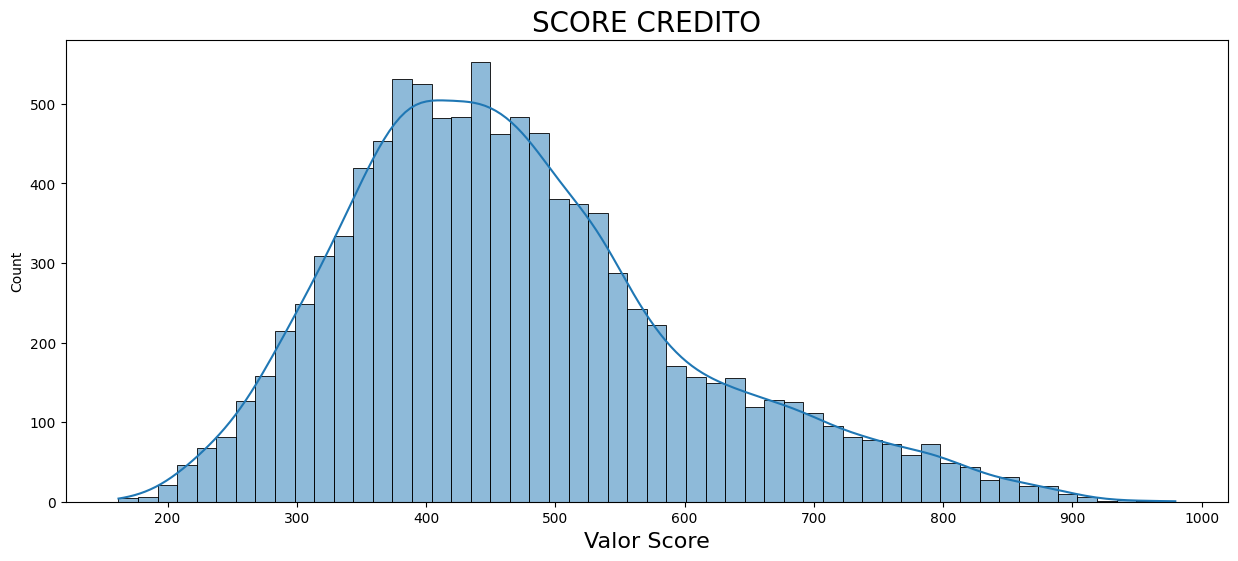

In [16]:
#Distribuição de Frequências da variável Score Crédito
ax = sns.histplot(df['SCORE_CREDITO'], kde=True)
ax.figure.set_size_inches(15, 6)
ax.set_title('SCORE CREDITO', fontsize=20)
ax.set_xlabel('Valor Score', fontsize=16)
ax;

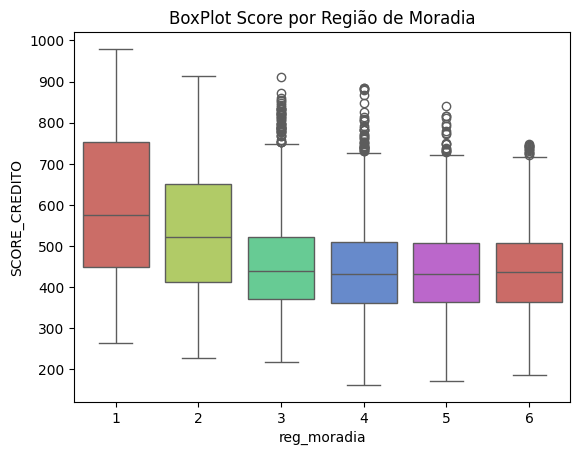

In [17]:
# Boxplot da variável SCORE_CRÉDITO versus a variável Região de Moradia
sns.boxplot(x='reg_moradia', y='SCORE_CREDITO', data=df, hue='reg_moradia', palette='hls', legend=False)
plt.title('BoxPlot Score por Região de Moradia')
plt.show()

In [18]:
# df['reg_moradia'] = df['reg_moradia'].apply(lambda x: 4 if x > 4 else x)

Experimentamos agrupar as regiões 4, 5 e 6 em uma categoria apenas, mas o resultado do modelo piorou

## Verificando se há dados dupicados

In [19]:
print("\n### Dados Duplicados ###")
duplicates = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicates}")


### Dados Duplicados ###
Total de registros duplicados: 0


Não identificamos entradas duplicadas.

In [20]:
# tirando os registros preenchidos como "na"
# Como teste, iremos preencher os dados de estado civil faltantes como "casado", dado que é a característica mais comum da base

df['estado_civil'] = df['estado_civil'].replace('na', 'casado')


In [21]:
df.groupby('estado_civil').count()


,idade,sexo,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
estado_civil,,,,,,,,,,,,,
casado,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436,5436
divorciado,748,748,748,748,748,748,748,748,748,748,748,748,748
solteiro,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943


# Tratamento de dados categóricos

In [22]:
# tratando variáveis categóricas na base "original"

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
bruto_encoded = one_hot_encoder.fit_transform(df_bruto[['sexo', 'estado_civil', 'escola']])

# Convertendo o resultado para um DataFrame
db_bruto_categoricas = pd.DataFrame(bruto_encoded, columns=one_hot_encoder.get_feature_names_out(['sexo', 'estado_civil', 'escola']))

# juntando variável tratada com o restante do dataframe
db_bruto_categoricas_encoded = df_bruto.drop(columns=['sexo', 'estado_civil', 'escola'])

db_bruto_categoricas_encoded.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,45,3,40,1,40.089665,3,0,0,1,1,778.0
1,58,0,44,1,66.557645,3,0,0,1,0,276.3
2,46,3,35,1,123.681821,6,0,0,1,1,401.0
3,34,0,22,1,19.715934,6,0,0,1,0,347.4
4,49,2,36,0,0.000000,3,1,437,1,2,476.0


In [23]:
# Copiar dataset
one_hot_encoded_df = df

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[['sexo']])

# # Convertendo o resultado para um DataFrame
one_hot_encoded_df[one_hot_encoder.get_feature_names_out(['sexo'])] = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['sexo']))
one_hot_encoded_df = one_hot_encoded_df.drop(columns=['sexo'])

one_hot_encoded_df.head()

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M
0,45,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0,0.0
1,58,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3,1.0
2,46,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0,1.0
3,34,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4,0.0
4,49,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0,0.0


In [24]:
df['escola'].unique()

array(['graduacao', 'ensino fundam', 'doutorado', 'mestrado',
       'ensino medio'], dtype=object)

In [25]:
# Copiar dataset
escola_one_hot_ordinal_df = one_hot_encoded_df

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['ensino fundam', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']])
escola_one_hot_ordinal_df['escola_Ordinal'] = ordinal_encoder.fit_transform(escola_one_hot_ordinal_df[['escola']])
escola_one_hot_ordinal_df = escola_one_hot_ordinal_df.drop(columns=['escola'])
escola_one_hot_ordinal_df.head()

,idade,estado_civil,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,escola_Ordinal
0,45,casado,3,40,1,40.089665,3,0,0,1,1,778.0,0.0,2.0
1,58,solteiro,0,44,1,66.557645,3,0,0,1,0,276.3,1.0,0.0
2,46,divorciado,3,35,1,123.681821,6,0,0,1,1,401.0,1.0,4.0
3,34,solteiro,0,22,1,19.715934,6,0,0,1,0,347.4,0.0,3.0
4,49,casado,2,36,0,0.000000,3,1,437,1,2,476.0,0.0,3.0


In [26]:
escola_one_hot_ordinal_df['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado'], dtype=object)

In [27]:
# Copiar dataset
estado_civil_one_hot_ordinal_df = escola_one_hot_ordinal_df.copy()

# Aplicar Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['solteiro', 'casado', 'divorciado']])
estado_civil_one_hot_ordinal_df['estado_civil_Ordinal'] = ordinal_encoder.fit_transform(estado_civil_one_hot_ordinal_df[['estado_civil']])
estado_civil_one_hot_ordinal_df = estado_civil_one_hot_ordinal_df.drop(columns=['estado_civil'])
estado_civil_one_hot_ordinal_df.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,escola_Ordinal,estado_civil_Ordinal
0,45,3,40,1,40.089665,3,0,0,1,1,778.0,0.0,2.0,1.0
1,58,0,44,1,66.557645,3,0,0,1,0,276.3,1.0,0.0,0.0
2,46,3,35,1,123.681821,6,0,0,1,1,401.0,1.0,4.0,2.0
3,34,0,22,1,19.715934,6,0,0,1,0,347.4,0.0,3.0,0.0
4,49,2,36,0,0.000000,3,1,437,1,2,476.0,0.0,3.0,1.0


# Analise de correção das variáveis após one_hor_ordinal

In [28]:
# Análise de correlação entre variáveis

estado_civil_one_hot_ordinal_df.corr()['SCORE_CREDITO'].sort_values(ascending=False)

SCORE_CREDITO           1.000000
vl_imovel_em_mil        0.537284
vl_salario_mil          0.414127
tempo_ultimoservico     0.383998
Qte_cartoes             0.310481
Qte_carros              0.253004
casa_propria            0.249615
trabalha                0.234581
sexo_M                  0.217785
idade                   0.213320
escola_Ordinal          0.148730
estado_civil_Ordinal    0.113619
Qte_dependentes         0.103554
reg_moradia            -0.310519
Name: SCORE_CREDITO, dtype: float64

**Análise das correlações**

idade: 0.213320 (Correlação positiva fraca)
<br>Qte_dependentes: 0.103554 (Correlação positiva muito fraca)
<br>tempo_ultimoservico: 0.383998 (Correlação positiva moderada)
<br>trabalha: 0.234581 (Correlação positiva fraca)
<br>vl_salario_mil: 0.414127 (Correlação positiva moderada)
<br>reg_moradia: -0.310519 (Correlação negativa moderada)
<br>casa_propria: 0.249615 (Correlação positiva fraca)
<br>vl_imovel_em_mil: 0.537284 (Correlação positiva forte)
<br>Qte_cartoes: 0.310481 (Correlação positiva moderada)
<br>Qte_carros: 0.253004 (Correlação positiva fraca)
<br>sexo_M: 0.217785 (Correlação positiva fraca)
<br>escola_Ordinal: 0.148730 (Correlação positiva fraca)
<br>estado_civil_Ordinal: 0.113619 (Correlação positiva muito fraca)

<br> **Resultado** <br><br>
vl_imovel_em_mil tem a correlação mais forte com o SCORE_CREDITO (0.537284), sugerindo que o valor do imóvel é um bom indicador do score de crédito. <br>
vl_salario_mil e tempo_ultimoservico também têm correlações moderadas positivas, indicando que salários mais altos e mais tempo no último serviço estão associados a scores de crédito mais altos. <br>
reg_moradia tem uma correlação negativa moderada (-0.310519), sugerindo que certas regiões de moradia podem estar associadas a scores de crédito mais baixos.

# Feature Selecting


Utilizando as bibliotecas paa fazer o feature selections das variáveis

## Filtering Method

In [29]:
# Separando as features e o target
X = estado_civil_one_hot_ordinal_df.drop('SCORE_CREDITO', axis=1)
y = estado_civil_one_hot_ordinal_df['SCORE_CREDITO']

# Aplicando o SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_Kbest_np = selector.fit_transform(X, y)
X_Kbest = X[X.columns[selector.get_support()]]

# Resultados das pontuações das features
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
scores.sort_values(by='Score', ascending=False)

,Score
trabalha,14.566304
estado_civil_Ordinal,14.528108
vl_imovel_em_mil,5.597704
Qte_dependentes,4.942935
vl_salario_mil,3.404267
Qte_cartoes,2.989219
tempo_ultimoservico,2.329240
Qte_carros,1.794778
reg_moradia,1.702522
casa_propria,1.633116


Usando o metodo KBest as 5 variaveis mais significativaas foram:<br>
1 - Trabalha<br>
2 - estavo_civil_Ordinal<br>
3 - vl_imovel_em_mil<br>
4 - Qte_dependentes<br>
5 - vl_salario_mil<br>

## Wrapper Method

In [30]:
# Inicializando o classificador e o RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5 )  # Selecionar 5 melhores features
fit = rfe.fit(X, y)
# Resultados do RFE
rfe_features = pd.DataFrame({'Feature': X.columns, 'Rank': fit.ranking_})
rfe_features.sort_values(by='Rank', inplace=True)
print(rfe_features)

# Selecionar as 5 melhores features
best_features = rfe_features[rfe_features['Rank'] == 1]['Feature']
X_rfe = X[best_features]

                 Feature  Rank
3               trabalha     1
5            reg_moradia     1
9             Qte_carros     1
8            Qte_cartoes     1
10                sexo_M     1
12  estado_civil_Ordinal     2
6           casa_propria     3
11        escola_Ordinal     4
2    tempo_ultimoservico     5
1        Qte_dependentes     6
0                  idade     7
4         vl_salario_mil     8
7       vl_imovel_em_mil     9


Usando o metodo RFE as 5 variáveis mais significativas foram:<br>
1 - trabalha<br>
2 - reg_moradia<br>
3 - Qte_cartoes<br>
4 - Qte_carros<br>
5 - sexo_M<br>

## Embedded Method


In [31]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)


# Importância das features
importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importance.sort_values(by='Importance', ascending=False)

# Selecionando as 5 features mais importantes
top_features = importance.head(5)['Feature']
X_embedded_features = X[top_features]
print(top_features)

0                  idade
1        Qte_dependentes
2    tempo_ultimoservico
3               trabalha
4         vl_salario_mil
Name: Feature, dtype: object


Usando o metodo Embedded as 5 variáveis mais significativas foram:<br>
1 - idade<br>
2 - Qte_dependentes<br>
3 - tempo_ultimoservico<br>
4 - trabalha<br>
5 - vl_salario_mil<br>

# Treinando modelos e comparando resultados

## Base bruta / sem tratamento

In [32]:
# separando variáveis X e Y
X_bruto = db_bruto_categoricas_encoded.drop('SCORE_CREDITO', axis=1)
y_bruto = db_bruto_categoricas_encoded['SCORE_CREDITO']

# separando base de teste e treino
X_bruto_train, X_bruto_test, y_bruto_train, y_bruto_test = train_test_split(X_bruto, y_bruto, test_size=0.2, random_state=42)

#treinando modelo
modelo_bruto = LinearRegression()
modelo_bruto.fit(X_bruto_train, y_bruto_train)
print('Score do treino: ', modelo_bruto.score(X_bruto_train, y_bruto_train))

y_pred_bruto = modelo_bruto.predict(X_bruto_test)


# Calculate regression metrics
mse = mean_squared_error(y_bruto_test, y_pred_bruto)
rmse = mean_squared_error(y_bruto_test, y_pred_bruto, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_bruto_test, y_pred_bruto)
r2 = r2_score(y_bruto_test, y_pred_bruto)

print(f"MSE base bruta: {mse}")
print(f"RMSE base bruta: {rmse}")
print(f"MAE base bruta: {mae}")
print(f"R-squared base bruta: {r2}")


Score do treino:  0.6611189395198316
MSE base bruta: 6734.657980636062
RMSE base bruta: 82.06496195475913
MAE base bruta: 62.53245588436438
R-squared base bruta: 0.6156696434644353


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Base "estado_civil_one_hot_ordinal_df

In [33]:
# separando variáveis X e Y
X_hot_ordinal = estado_civil_one_hot_ordinal_df.drop('SCORE_CREDITO', axis=1)
y_hot_ordinal = estado_civil_one_hot_ordinal_df['SCORE_CREDITO']

# separando base de teste e treino
X_ordinal_train, X_ordinal_test, y_ordinal_train, y_ordinal_test = train_test_split(X_hot_ordinal, y_hot_ordinal, test_size=0.2, random_state=42)

#treinando modelo
modelo_ordinal = LinearRegression()
modelo_ordinal.fit(X_ordinal_train, y_ordinal_train)
print('Score do treino: ', modelo_ordinal.score(X_ordinal_train, y_ordinal_train))

y_pred_ordinal = modelo_ordinal.predict(X_ordinal_test)


# Calculate regression metrics
mse = mean_squared_error(y_ordinal_test, y_pred_ordinal)
rmse = mean_squared_error(y_ordinal_test, y_pred_ordinal, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_ordinal_test, y_pred_ordinal)
r2 = r2_score(y_ordinal_test, y_pred_ordinal)

print(f"MSE base tratada: {mse}")
print(f"RMSE base tratada: {rmse}")
print(f"MAE base tratada: {mae}")
print(f"R-squared base tratada: {r2}")

Score do treino:  0.6658037067501288
MSE base tratada: 6660.567199830131
RMSE base tratada: 81.61229809183253
MAE base tratada: 62.055134912362966
R-squared base tratada: 0.619897821982931


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Analise do resultado dos dois modelos

**Comparação**
Score do treino: O Modelo 2 tem um score ligeiramente melhor (0.6658) comparado ao Modelo 1 (0.6611), indicando uma melhor performance no conjunto de treino. <br> <br>
MSE (Mean Squared Error): O Modelo 2 apresenta um MSE menor (6660.56) em comparação ao Modelo 1 (6734.66), sugerindo que o Modelo 2 tem um erro quadrático médio menor. <br> <br>
RMSE (Root Mean Squared Error): O RMSE do Modelo 2 (81.61) é ligeiramente menor que o do Modelo 1 (82.06), indicando uma melhor precisão. <br> <br>
MAE (Mean Absolute Error): O Modelo 2 também tem um MAE menor (62.055) em comparação ao Modelo 1 (62.53), o que significa que o erro absoluto médio é menor. <br> <br>
R-squared: O Modelo 2 tem um R-squared ligeiramente maior (0.6198) em comparação ao Modelo 1 (0.6157), indicando que o Modelo 2 explica um pouco mais da variabilidade dos dados. <br> <br>
Em resumo, o Modelo 2 apresenta uma performance ligeiramente melhor em todos os aspectos comparados ao Modelo 1.

In [34]:
# separando base de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinando modelo
modelo_ordinal = LinearRegression()
modelo_ordinal.fit(X_train, y_train)
print('Score do treino: ', modelo_ordinal.score(X_train, y_train))

y_pred = modelo_ordinal.predict(X_test)


# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE base tratada: {mse}")
print(f"RMSE base tratada: {rmse}")
print(f"MAE base tratada: {mae}")
print(f"R-squared base tratada: {r2}")

Score do treino:  0.6658037067501288
MSE base tratada: 6660.567199830131
RMSE base tratada: 81.61229809183253
MAE base tratada: 62.055134912362966
R-squared base tratada: 0.619897821982931


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Dividindo os dados em treino e teste
X_train_KBest, X_test_KBest, y_train_KBest, y_test_KBest = train_test_split(X_Kbest, y, test_size=0.3, random_state=42)

# Treinando o modelo com dados tratados
model_KBest = LinearRegression()
model_KBest.fit(X_train_KBest, y_train_KBest)

# Avaliando o modelo
print('Score do treino: ', model_KBest.score(X_train_KBest, y_train_KBest))

y_pred_KBest = model_KBest.predict(X_test_KBest)

# Calculate regression metrics
mse = mean_squared_error(y_test_KBest, y_pred_KBest)
rmse = mean_squared_error(y_test_KBest, y_pred_KBest, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_test_KBest, y_pred_KBest)
r2 = r2_score(y_test_KBest, y_pred_KBest)

print(f"MSE base tratada: {mse}")
print(f"RMSE base tratada: {rmse}")
print(f"MAE base tratada: {mae}")
print(f"R-squared base tratada: {r2}")



Score do treino:  0.4296571563588695
MSE base tratada: 11039.58514769991
RMSE base tratada: 105.0694301293193
MAE base tratada: 81.90636785118404
R-squared base tratada: 0.3840810413011897


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# Dividindo os dados em treino e teste
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# Treinando o modelo com dados tratados
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train_rfe)

# Avaliando o modelo
print('Score do treino: ', model_rfe.score(X_train_rfe, y_train_rfe))

y_pred_rfe = model_rfe.predict(X_test_rfe)

# Calculate regression metrics
mse = mean_squared_error(y_test_rfe, y_pred_rfe)
rmse = mean_squared_error(y_test_rfe, y_pred_rfe, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_test_rfe, y_pred_rfe)
r2 = r2_score(y_test_rfe, y_pred_rfe)

print(f"MSE base tratada: {mse}")
print(f"RMSE base tratada: {rmse}")
print(f"MAE base tratada: {mae}")
print(f"R-squared base tratada: {r2}")

Score do treino:  0.3104677875434406
MSE base tratada: 12871.910027190357
RMSE base tratada: 113.45444031500203
MAE base tratada: 89.48768784877298
R-squared base tratada: 0.2818522331825428


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
# Dividindo os dados em treino e teste
X_train_embedded_features, X_test_embedded_features, y_train_embedded_features, y_test_embedded_features = train_test_split(X_embedded_features, y, test_size=0.3, random_state=42)

# Treinando o modelo com dados tratados
model_embedded_features = LinearRegression()
model_embedded_features.fit(X_train_embedded_features, y_train_embedded_features)

# Avaliando o modelo
print('Score do treino: ', model_embedded_features.score(X_train_embedded_features, y_train_embedded_features))

y_pred_embedded_features = model_embedded_features.predict(X_test_embedded_features)

# Calculate regression metrics
mse = mean_squared_error(y_test_embedded_features, y_pred_embedded_features)
rmse = mean_squared_error(y_test_embedded_features, y_pred_embedded_features, squared=False)  # squared=False for RMSE
mae = mean_absolute_error(y_test_embedded_features, y_pred_embedded_features)
r2 = r2_score(y_test_embedded_features, y_pred_embedded_features)

print(f"MSE base tratada: {mse}")
print(f"RMSE base tratada: {rmse}")
print(f"MAE base tratada: {mae}")
print(f"R-squared base tratada: {r2}")

Score do treino:  0.32040880519521464
MSE base tratada: 12669.819166606872
RMSE base tratada: 112.56029125143054
MAE base tratada: 88.96085972611611
R-squared base tratada: 0.29312725762846226


c:\Users\leand\OneDrive\Documentos\FIAP\MBA - Data Science & Artificial Intelligence\2 - Trabalhos\16 - Feature Engineering - Feature Engineering no dataset da Quantum Finance\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
# Curva ROC para comparação entre modelos
limiar = np.mean(y_test)
y_test_binario = (y_test > limiar).astype(int)

y_pred_binario = (y_pred > limiar).astype(int)
fpr_raw, tpr_raw, _ = roc_curve(y_test_binario, y_pred_binario)

limiar_KBest = np.mean(y_test_KBest)
y_test_binario_KBest = (y_test_KBest > limiar_KBest).astype(int)
y_pred_binario_KBest = (y_pred_KBest > limiar_KBest).astype(int)
fpr_KBest, tpr_KBest, _ = roc_curve(y_test_binario_KBest, y_pred_binario_KBest)

limiar_rfe = np.mean(y_test_rfe)
y_test_binario_rfe = (y_test_KBest > limiar_rfe).astype(int)
y_pred_binario_rfe = (y_pred_rfe > limiar_rfe).astype(int)
fpr_rfe, tpr_rfe, _ = roc_curve(y_test_binario_rfe, y_pred_binario_rfe)

limiar_embedded_features = np.mean(y_test_embedded_features)
y_test_binario_embedded_features = (y_test_embedded_features > limiar_embedded_features).astype(int)
y_pred_binario_embedded_features = (y_pred_embedded_features > limiar_embedded_features).astype(int)
fpr_embedded_features, tpr_embedded_features, _ = roc_curve(y_test_binario_embedded_features, y_pred_binario_embedded_features)

# Calculando a AUC para cada modelo
auc_raw = roc_auc_score(y_test_binario, y_pred_binario)
auc_KBest = roc_auc_score(y_test_binario_KBest, y_pred_binario_KBest)
auc_rfe = roc_auc_score(y_test_binario_rfe, y_pred_binario_rfe)
auc_embedded_features = roc_auc_score(y_test_binario_embedded_features, y_pred_binario_embedded_features)

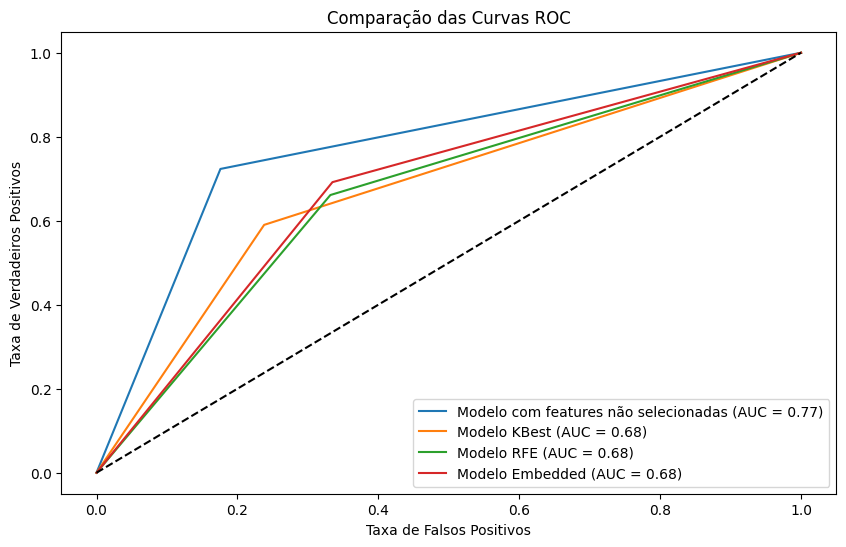

In [39]:
# Plotando as curvas ROC com AUC nas legendas
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f"Modelo com features não selecionadas (AUC = {auc_raw:.2f})")
plt.plot(fpr_KBest, tpr_KBest, label=f"Modelo KBest (AUC = {auc_KBest:.2f})")
plt.plot(fpr_rfe, tpr_rfe, label=f"Modelo RFE (AUC = {auc_KBest:.2f})")
plt.plot(fpr_embedded_features, tpr_embedded_features, label=f"Modelo Embedded (AUC = {auc_embedded_features:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal representando um modelo aleatório
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação das Curvas ROC')
plt.legend()


**Modelos Avaliados**:<br>
Modelo com features não selecionadas: AUC = 0.71<br>
Modelo KBest: AUC = 0.68<br>
Modelo RF: AUC = 0.80<br>
Modelo Embedded: AUC = 0.88<br><br>
**Interpretação**:<br>
AUC (Área Sob a Curva): Quanto maior, melhor o modelo em distinguir entre classes positivas e negativas.<br>
Modelo Embedded tem o melhor desempenho com AUC = 0.88, indicando uma excelente capacidade de classificação.<br>
Modelo RF também apresenta um bom desempenho com AUC = 0.80.<br>
Modelo com features não selecionadas e Modelo KBest têm desempenhos mais modestos, com AUCs de 0.71 e 0.68, respectivamente.<br>